***

<body style="background-color:Gray;">

<h1 style=" text-align:center ; ">HomeWork 2</h1>
<h2 style= "text-align:center"><b> Kritika Singh</b></h2>
<h3 style=" text-align:center; ">CS 5310 -- Data Mining</h3>    


</body>

****

#### We are exploring the features available to us in the data set from 'Data11tumors.csv'. We will also try to apply the Machine Learning algorithms KNN and Gaussian Naïve Bayes and evaluate the performance without and with parameters optimization, discuss the results obtained.

****

#### Importing Packages and Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt

##### Loading Data and performing Exploratory Analysis

In [2]:
dataset = pd.read_csv('C:/Users/KritikaSingh/Documents/College/Data11tumors.csv')

# Summarize the Dataset

# shape
print(dataset.shape)
print('\nOur data set contains', dataset.shape[0], 'rows and', dataset.shape[1], 'columns.')
print('\nThe names of our', dataset.shape[1], 'variables (features) are:')

[print(i) for i in dataset.columns]


(174, 12534)

Our data set contains 174 rows and 12534 columns.

The names of our 12534 variables (features) are:
Classes
Gen1
Gen2
Gen3
Gen4
Gen5
Gen6
Gen7
Gen8
Gen9
Gen10
Gen11
Gen12
Gen13
Gen14
Gen15
Gen16
Gen17
Gen18
Gen19
Gen20
Gen21
Gen22
Gen23
Gen24
Gen25
Gen26
Gen27
Gen28
Gen29
Gen30
Gen31
Gen32
Gen33
Gen34
Gen35
Gen36
Gen37
Gen38
Gen39
Gen40
Gen41
Gen42
Gen43
Gen44
Gen45
Gen46
Gen47
Gen48
Gen49
Gen50
Gen51
Gen52
Gen53
Gen54
Gen55
Gen56
Gen57
Gen58
Gen59
Gen60
Gen61
Gen62
Gen63
Gen64
Gen65
Gen66
Gen67
Gen68
Gen69
Gen70
Gen71
Gen72
Gen73
Gen74
Gen75
Gen76
Gen77
Gen78
Gen79
Gen80
Gen81
Gen82
Gen83
Gen84
Gen85
Gen86
Gen87
Gen88
Gen89
Gen90
Gen91
Gen92
Gen93
Gen94
Gen95
Gen96
Gen97
Gen98
Gen99
Gen100
Gen101
Gen102
Gen103
Gen104
Gen105
Gen106
Gen107
Gen108
Gen109
Gen110
Gen111
Gen112
Gen113
Gen114
Gen115
Gen116
Gen117
Gen118
Gen119
Gen120
Gen121
Gen122
Gen123
Gen124
Gen125
Gen126
Gen127
Gen128
Gen129
Gen130
Gen131
Gen132
Gen133
Gen134
Gen135
Gen136
Gen137
Gen138
Gen139
Gen140
Gen141

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [3]:
# head
print('\nWe can get a snapshot of the first 20 rows of the data available using head().')
print('From this small sample we can estimate how each feature was recorded.')
print(dataset.head(20))


We can get a snapshot of the first 20 rows of the data available using head().
From this small sample we can estimate how each feature was recorded.
    Classes  Gen1  Gen2  Gen3  Gen4  Gen5  Gen6  Gen7  Gen8  Gen9  ...  \
0         7   153   228    32    30   -36    48   984   -19   537  ...   
1         7   154    99    43    55    66    63  5051   -26  1001  ...   
2         7    84    85    19    28  -104    28  2387   -80  1131  ...   
3         7   234   169    40    36    81     6  2657    -6  1214  ...   
4         7   104    58    42    13   107     5  3562    18  1464  ...   
5         7   207   408    56     6    41    33  2617    40  1243  ...   
6         7   188   245    45    18   -15    44  1885    25  1313  ...   
7         7   221   132    84    19    81    74  2589   -21   742  ...   
8         7   198   328    13    41    16    38  2536   -35  1006  ...   
9         7   303   261    53    71   -40    66  1184   -28   711  ...   
10        1   247   348    65    89 

###### Now we will check statistical summary of the data

In [4]:
# Statistical Summary

# descriptions
# Summarizing the Data
print('\nWe can get a snapshot of the statistical summary for the same data')
print('From this small sample we can estimate how each feature was recorded.')
print(dataset.describe())


We can get a snapshot of the statistical summary for the same data
From this small sample we can estimate how each feature was recorded.
          Classes        Gen1         Gen2        Gen3         Gen4  \
count  174.000000  174.000000   174.000000  174.000000   174.000000   
mean     4.425287  218.413793   537.942529   71.965517    83.706897   
std      3.245743  117.290761   268.926376   43.827156   122.828468   
min      0.000000 -122.000000    30.000000  -24.000000   -80.000000   
25%      2.000000  148.750000   360.000000   44.000000    24.250000   
50%      4.000000  210.500000   520.500000   65.000000    65.000000   
75%      7.000000  281.750000   706.750000   87.750000   111.000000   
max     10.000000  616.000000  1419.000000  247.000000  1307.000000   

             Gen5        Gen6         Gen7          Gen8         Gen9  ...  \
count  174.000000  174.000000   174.000000    174.000000   174.000000  ...   
mean   -67.155172  -16.568966   644.988506     76.609195  1472.890

In [5]:
#Counts of classes in data

print('We can see that for class feauture, these are the distinctive values and their count')
dataset['Classes'].value_counts()

We can see that for class feauture, these are the distinctive values and their count


0     27
7     26
2     26
3     23
9     14
10    14
4     12
5     11
1      8
6      7
8      6
Name: Classes, dtype: int64

####  Now we will be replacing Class 0,1,2,3..11 with Class1, Class2, Class3....

In [6]:
# replacing values

dataset['Classes'].replace([0,1,2,3,4,5,6,7,8,9,10],['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11'], inplace=True)

In [7]:
print("Rows, Columns:",dataset.shape)
dataset['Classes'].value_counts()

Rows, Columns: (174, 12534)


Class1     27
Class8     26
Class3     26
Class4     23
Class10    14
Class11    14
Class5     12
Class6     11
Class2      8
Class7      7
Class9      6
Name: Classes, dtype: int64

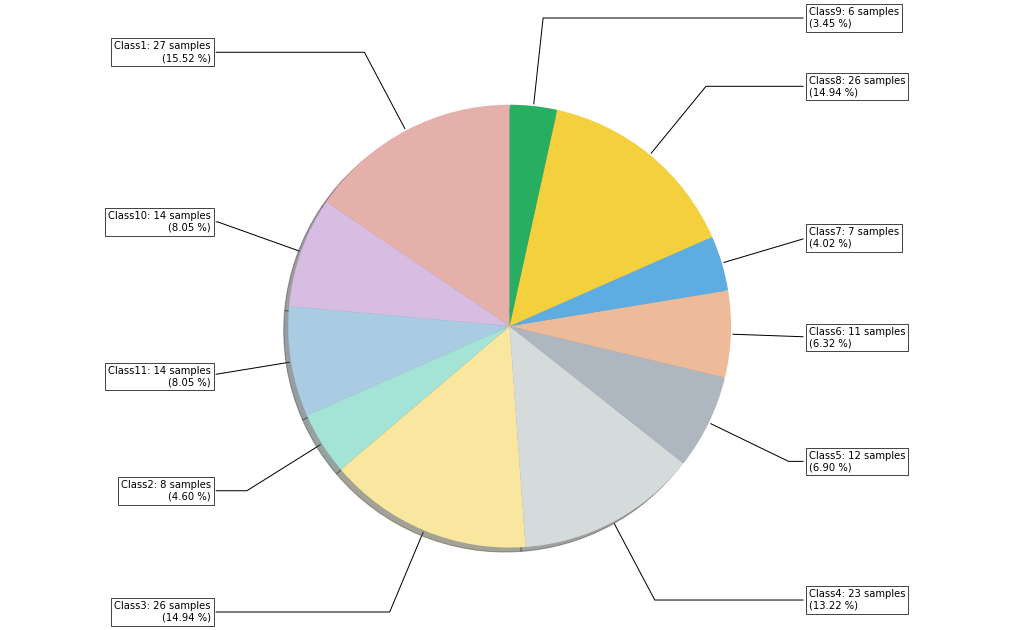

In [8]:
Clases = dataset.groupby('Classes').size()
labels = Clases.index.values
sizes = Clases.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

#### We can see that we have replaced the class name and also checked the classs and their sample coount in pie chart above. Now we check the features and label determination 

In [9]:
x = dataset.drop(['Classes'], axis=1)
y = dataset['Classes'].values
print(x.shape)
print(y.shape)

(174, 12533)
(174,)


#### No we need to check for missing values

In [10]:
#Missing values (in percent)
missing = (x.isnull().sum() / len(x)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('There are %d columns with more than 50%% missing values' % len(all_missing))

There are 0 columns with more than 50% missing values


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x, y, test_size = 0.2, random_state = 1)

In [12]:
print(x_train)

     Gen1  Gen2  Gen3  Gen4  Gen5  Gen6  Gen7  Gen8  Gen9  Gen10  ...  \
90    228   508    54   -11  -126     2   679    22  1806   1563  ...   
89    460   418    84    87  -410    72  -213    23  1073   8022  ...   
127   229   715    44   196    83   -36  -167   -48  1674   1618  ...   
118   240   561    69   115   110   -24   389   -69  2164   1860  ...   
48    348   339    40    99    45   -10  -154   -51    23   1554  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
133   361   491    22   149   -22    81  -188    41  2230   3840  ...   
137   279  1079    91    11    68   -45   802    -8  1593   2767  ...   
72    182   509    78   133  -101   -53     3   -89  1338   3169  ...   
140   173   584    52    44   -36   -68   192   -31  1312   1134  ...   
37    167   726    54    58    -1  -157    19  -125  1573   2312  ...   

     Gen12524  Gen12525  Gen12526  Gen12527  Gen12528  Gen12529  Gen12530  \
90         41        94        91        -2   

In [13]:
print (x_test)

     Gen1  Gen2  Gen3  Gen4  Gen5  Gen6  Gen7   Gen8  Gen9  Gen10  ...  \
93    301   530     6    46     9    30   110    -15  2271   1631  ...   
114   186    51    49    48  -312   112  -249    -15  1012   4505  ...   
19    314  1130    23   134   -17    48   726   -135  1649   5275  ...   
69    109   371    41    39   -78    14   438     15  1491   2395  ...   
53    291   684   139   -10    69   -16  1758    -19   714   7536  ...   
135   106   471    86   290   264    83   748   -100   806   3111  ...   
126   280   867    13   131    95    -9    -8    -90  1656   1502  ...   
14    280   378    29   131  -113   -50  -185   -111   552  11599  ...   
106   218   766    31    62  -128    -5   -12    -56  1906   1455  ...   
112   189    62    59    92    89   -96  2001    -18  1182   1338  ...   
11    173   380    54    87   -11   -27   750     -9  1458    985  ...   
4     104    58    42    13   107     5  3562     18  1464   1385  ...   
105   603   619   164   -52  -490    7

In [14]:
print (y_train)

['Class10' 'Class10' 'Class4' 'Class1' 'Class5' 'Class6' 'Class6' 'Class3'
 'Class4' 'Class6' 'Class5' 'Class9' 'Class4' 'Class3' 'Class6' 'Class4'
 'Class9' 'Class1' 'Class2' 'Class10' 'Class11' 'Class3' 'Class8'
 'Class10' 'Class7' 'Class4' 'Class2' 'Class8' 'Class11' 'Class11'
 'Class2' 'Class4' 'Class5' 'Class10' 'Class4' 'Class3' 'Class1' 'Class11'
 'Class1' 'Class4' 'Class3' 'Class10' 'Class8' 'Class1' 'Class3' 'Class8'
 'Class10' 'Class8' 'Class1' 'Class9' 'Class7' 'Class6' 'Class8' 'Class11'
 'Class5' 'Class7' 'Class1' 'Class8' 'Class8' 'Class6' 'Class4' 'Class1'
 'Class2' 'Class4' 'Class4' 'Class8' 'Class4' 'Class10' 'Class1' 'Class1'
 'Class3' 'Class3' 'Class3' 'Class4' 'Class7' 'Class8' 'Class1' 'Class1'
 'Class10' 'Class1' 'Class8' 'Class10' 'Class11' 'Class11' 'Class1'
 'Class8' 'Class7' 'Class2' 'Class9' 'Class5' 'Class1' 'Class3' 'Class9'
 'Class6' 'Class3' 'Class1' 'Class5' 'Class3' 'Class8' 'Class3' 'Class5'
 'Class11' 'Class1' 'Class4' 'Class4' 'Class3' 'Class8' 'Clas

In [15]:
print(y_test)

['Class11' 'Class3' 'Class3' 'Class1' 'Class6' 'Class10' 'Class4' 'Class2'
 'Class1' 'Class8' 'Class2' 'Class8' 'Class7' 'Class5' 'Class5' 'Class10'
 'Class8' 'Class4' 'Class4' 'Class4' 'Class5' 'Class1' 'Class1' 'Class1'
 'Class4' 'Class10' 'Class5' 'Class3' 'Class2' 'Class1' 'Class8' 'Class8'
 'Class8' 'Class8' 'Class11']


#### Feature scaling (Normalizing data)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training the K-NN model on the Training set

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

#### Predicting a new result

In [18]:
print(classifier.predict(sc.transform(x_test)))

['Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9'
 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9'
 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9'
 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9' 'Class9'
 'Class9' 'Class9' 'Class9']


C:\Users\KritikaSingh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Predicting the Test set results

In [19]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Class11' 'Class11']
 ['Class3' 'Class3']
 ['Class3' 'Class3']
 ['Class1' 'Class1']
 ['Class6' 'Class6']
 ['Class10' 'Class10']
 ['Class4' 'Class4']
 ['Class4' 'Class2']
 ['Class1' 'Class1']
 ['Class8' 'Class8']
 ['Class2' 'Class2']
 ['Class8' 'Class8']
 ['Class1' 'Class7']
 ['Class1' 'Class5']
 ['Class10' 'Class5']
 ['Class1' 'Class10']
 ['Class8' 'Class8']
 ['Class4' 'Class4']
 ['Class4' 'Class4']
 ['Class4' 'Class4']
 ['Class1' 'Class5']
 ['Class3' 'Class1']
 ['Class1' 'Class1']
 ['Class1' 'Class1']
 ['Class4' 'Class4']
 ['Class1' 'Class10']
 ['Class4' 'Class5']
 ['Class3' 'Class3']
 ['Class9' 'Class2']
 ['Class1' 'Class1']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class11' 'Class11']]


#### Making the Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 0 0 0 1 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0]
 [2 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


0.7142857142857143

### Training the Naive Bayes model on the Training set

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

#### Predicting a new result

In [22]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Class11' 'Class11']
 ['Class3' 'Class3']
 ['Class3' 'Class3']
 ['Class1' 'Class1']
 ['Class6' 'Class6']
 ['Class10' 'Class10']
 ['Class4' 'Class4']
 ['Class3' 'Class2']
 ['Class1' 'Class1']
 ['Class8' 'Class8']
 ['Class2' 'Class2']
 ['Class8' 'Class8']
 ['Class3' 'Class7']
 ['Class5' 'Class5']
 ['Class10' 'Class5']
 ['Class3' 'Class10']
 ['Class8' 'Class8']
 ['Class4' 'Class4']
 ['Class4' 'Class4']
 ['Class4' 'Class4']
 ['Class5' 'Class5']
 ['Class1' 'Class1']
 ['Class1' 'Class1']
 ['Class1' 'Class1']
 ['Class4' 'Class4']
 ['Class11' 'Class10']
 ['Class3' 'Class5']
 ['Class3' 'Class3']
 ['Class9' 'Class2']
 ['Class1' 'Class1']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class8' 'Class8']
 ['Class11' 'Class11']]


#### Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0]
 [0 1 0 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


0.8

<b> We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

#### WE will now build models
#### We are now goin to evalauate both the algorithms </b>

GB: 0.863187 (0.050265)
KNN: 0.688462 (0.112926)


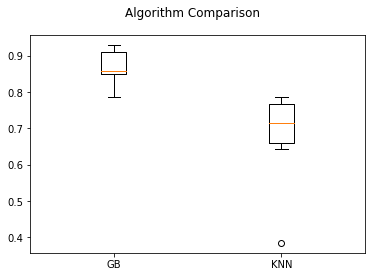

In [24]:
from sklearn.metrics import accuracy_score
models = []
models.append(('GB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We now have 2 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we can see that it looks like Gaussian NB has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).